# PREDICCIÓN DE ATAQUES AL CORAZÓN

In [1]:
#IMPORTANDO LIBRERÍAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
#Creación de dataframe
data = pd.read_csv("Heart Attack.csv", thousands=',')

In [3]:
#Visualización de datos
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
#Visualizar número de columnas y de registros
data.shape

(1319, 9)

In [5]:
#Imprimir algunos valores estadísticos
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
#Información de los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [7]:
#REGISTROS EN BLANCO#
print("Registros en blanco del data")
print("----------------------------------")
print(pd.isnull(data).sum())

Registros en blanco del data
----------------------------------
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [8]:
#CAMBIANDO VALORES CATEGÓRICOS A NUMÉRICOS
encoder = LabelEncoder()
data["class"] = encoder.fit_transform(data["class"])

In [9]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [10]:
#Creación de función para imprimir valores estadísticos de campos específicos
def imprimir_medidas(value):
    print("Media")
    print("-----------")
    print(round(data[value].mean(),2))
    print("\nMedia recortada")
    print("-----------")
    print(round(stats.trim_mean(data[value], 0.1),2))
    print("\nMediana")
    print("-----------")
    print(round(data[value].median(),2))
    print("\nMedia ponderada")
    print("-----------")
    print(round((data[value] * data["gender"]).sum() / data["gender"].sum(),2))
    print("\nDesviación estandar")
    print("-----------")
    print(round(data[value].std(),2))
    from numpy import var
    print("\nVarianza")
    print("-----------")
    print(round(var(data[value]),2))

In [11]:
imprimir_medidas("impluse")

Media
-----------
78.34

Media recortada
-----------
74.77

Mediana
-----------
74.0

Media ponderada
-----------
77.34

Desviación estandar
-----------
51.63

Varianza
-----------
2663.66


In [12]:
print("Número de hombres")
print("-----------")
print(data["gender"].sum())
print("\nNúmero de mujeres")
print("-----------")
print(data["gender"].count()-data["gender"].sum())

Número de hombres
-----------
870

Número de mujeres
-----------
449


# Información sobre el dataset

- Tamaño del Dataset: Contiene 1319 registros y 9 columnas
- Tipo de datos: Contiene datos de tipo int64, float64 y object
- Valores nulos: No tiene
- Detalles estadísticos: Los valores de 'min', 'max', 'mean' y 'std' indican el ramgo y la dispersión de datos las           cuales nos podrían indicar de la presención de valores atípicos (outliers)

# Exploración de Datos

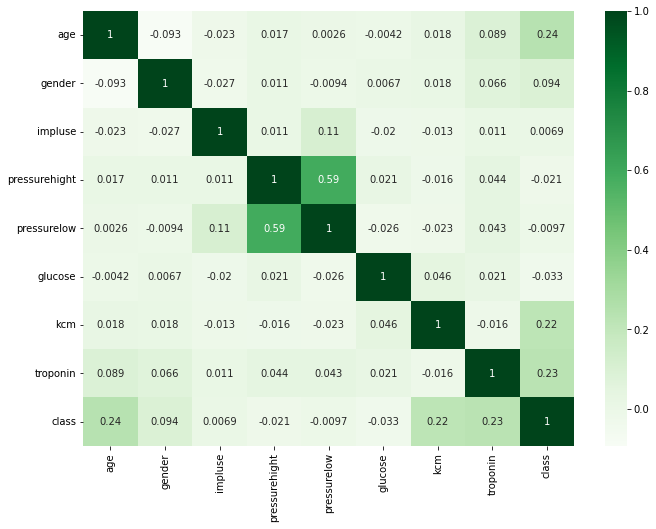

In [13]:
#MATRIZ DE CORRELACIÓN
corr = data.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

<AxesSubplot:title={'center':'Alta presión vs Glucosa'}, xlabel='glucose', ylabel='pressurehight'>

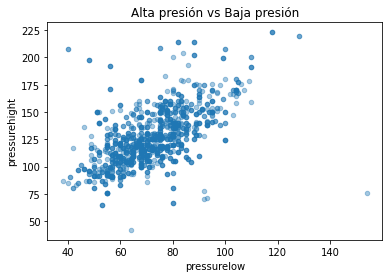

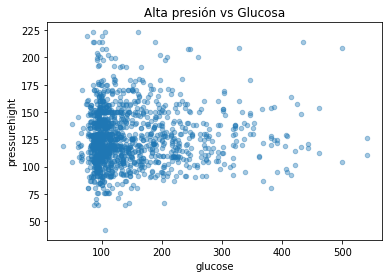

In [14]:
#Diagrama de dispersión
data.plot(kind="scatter", x="pressurelow", y="pressurehight", alpha=0.4, title="Alta presión vs Baja presión")
data.plot(kind="scatter", x="glucose", y="pressurehight", alpha=0.4, title="Alta presión vs Glucosa")

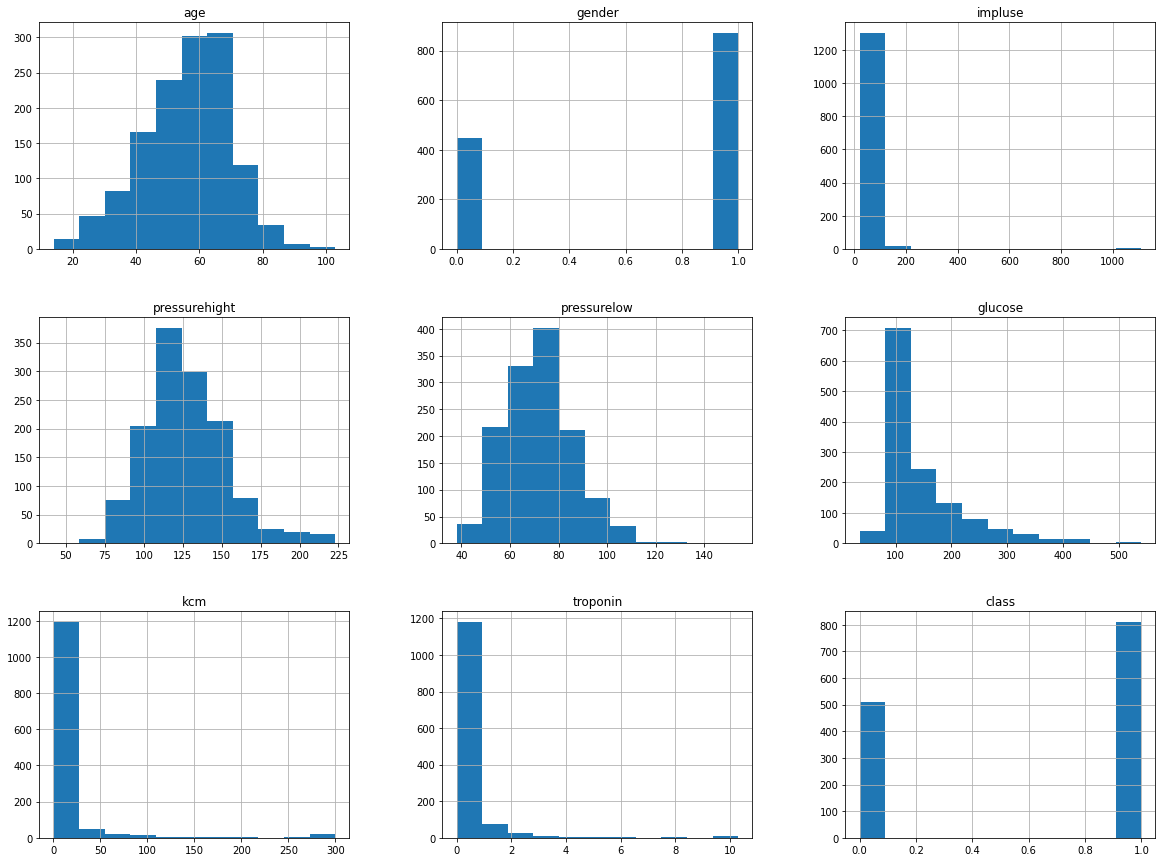

In [15]:
#HISTOGRAMA
data.hist(bins=11, figsize=(20,15))
plt.show()

Text(0, 0.5, 'Conteo de valores')

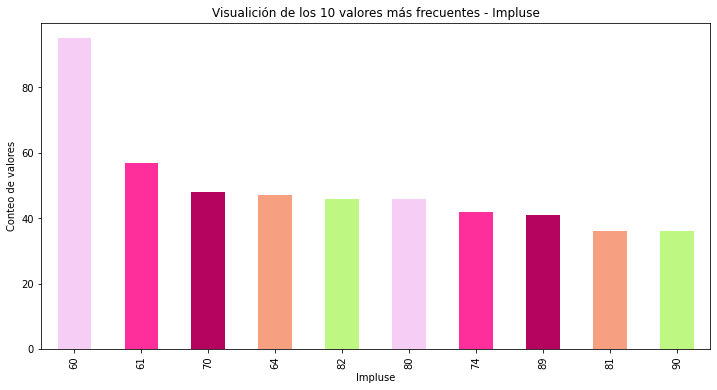

In [16]:
#Gráfica de los 10 mayores valores (conteo) de Impulse
data['impluse'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6),color=['#F6CEF5','#FE2E9A','#B4045F','#F79F81','#BEF781'])
plt.title("Visualición de los 10 valores más frecuentes - Impluse")
plt.xlabel("Impluse")
plt.xticks(rotation=90)
plt.ylabel("Conteo de valores")

Text(0, 0.5, 'Conteo de valores')

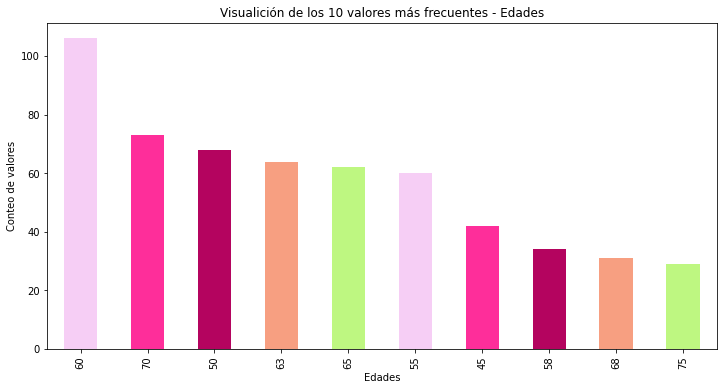

In [17]:
#Gráfica de los 10 mayores valores (conteo) de Edades
data['age'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6),color=['#F6CEF5','#FE2E9A','#B4045F','#F79F81','#BEF781'])
plt.title("Visualición de los 10 valores más frecuentes - Edades")
plt.xlabel("Edades")
plt.xticks(rotation=90)
plt.ylabel("Conteo de valores")

Text(0, 0.5, 'Conteo de valores')

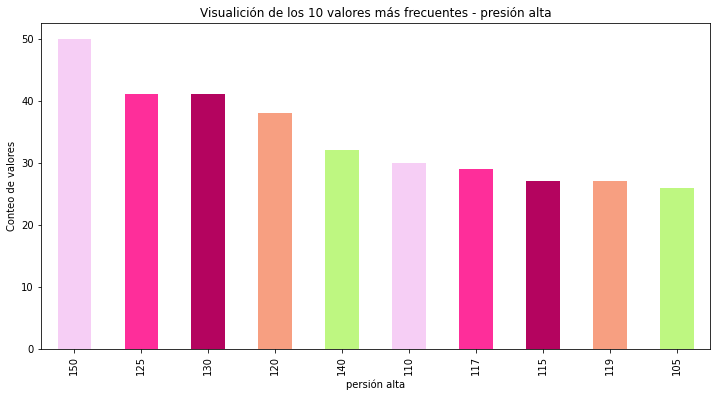

In [18]:
#Gráfica de los 10 mayores valores (conteo) de Presión alta
data['pressurehight'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6),color=['#F6CEF5','#FE2E9A','#B4045F','#F79F81','#BEF781'])
plt.title("Visualición de los 10 valores más frecuentes - presión alta")
plt.xlabel("persión alta")
plt.xticks(rotation=90)
plt.ylabel("Conteo de valores")

Text(0, 0.5, 'Conteo de valores')

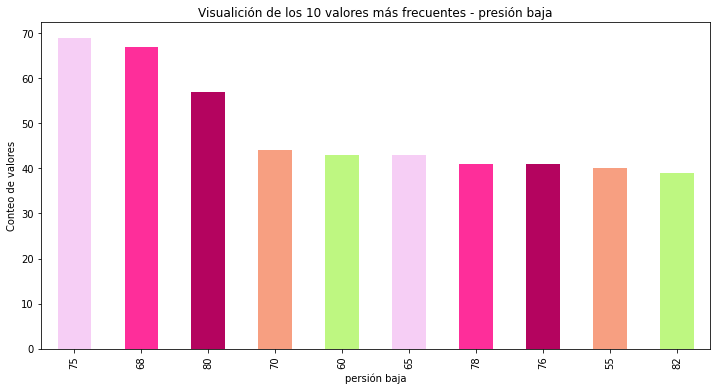

In [19]:
#Gráfica de los 10 mayores valores (conteo) de presión baja
data['pressurelow'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6),color=['#F6CEF5','#FE2E9A','#B4045F','#F79F81','#BEF781'])
plt.title("Visualición de los 10 valores más frecuentes - presión baja")
plt.xlabel("persión baja")
plt.xticks(rotation=90)
plt.ylabel("Conteo de valores")

<AxesSubplot:title={'center':'Gráfica de barras'}>

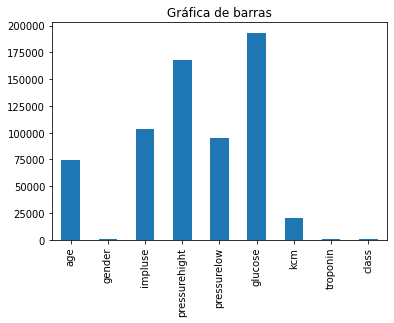

In [20]:
#Gráfica de frecuencia de las columnas
data.sum().plot(kind="bar",title="Gráfica de barras")

# Observaciones:

- Existe una correlación positiva entre la presión alta y baja
- Hay más de 100 personas que tiene 60 años
- Aproximadamente 50 personas tienen presión alta de 150
- Menos de 70 personas tienen presión baja de 75

# Modelos de Machine Learning

- Primero importo las librerías
- Luego elimino la columna clase, puesto que es nuestro objetivo a predecir
- Paso a escalar la data, para luego dividir en datos de entrenamiento (80%) y de prueba (20%)
- Creo una función para evaluar un modelo determinado (ajustar datos (fit), predicir modelo (predict) y determinar su presición)

In [21]:
# Importamos todas las librerías requeridas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Eliminamos la columna clase
X=data.drop(['class'],axis=1)
Y=data['class']
# Escalamiento de data 
scaler=StandardScaler()
X=scaler.fit_transform(X)
# Dividimos los datos en entrenamiento y testeo
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=120)

In [23]:
# Crear una función para modelos de machine learning
def model_bulding(model,X_train,X_test,y_train,y_test):
    print(f'Nombre del modelo {model}')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(f'\nEl puntaje de la precisión es {score*100:.2f}')
    print(f'\n{classification_report(y_test,y_pred)}')
    print(f'\n{confusion_matrix(y_test,y_pred)}')
    print('__'*20)

In [24]:
# Crear un diccionario con los nombres de los modelos a usar
models={
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'radnom':RandomForestClassifier(),
    'Kneighbors':KNeighborsClassifier()
}

In [25]:
# Itero cada modelo y visualizo los reportes de clasificación
for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_bulding(model,X_train,X_test,y_train,y_test)

Nombre del modelo LogisticRegression()

El puntaje de la precisión es 79.92

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       116
           1       0.85      0.78      0.81       148

    accuracy                           0.80       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.80      0.80      0.80       264


[[ 96  20]
 [ 33 115]]
________________________________________
Nombre del modelo DecisionTreeClassifier()

El puntaje de la precisión es 97.73

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       116
           1       0.98      0.98      0.98       148

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


[[113   3]
 [  3 145]]
________________________________________
Nombre del modelo RandomForestClassifier()

El puntaje de 

# CONCLUSIÓN

Vemos que el modelo de clasificación de Random Forest nos da una mejor presición en la predicción: 98.48%